<a href="https://colab.research.google.com/github/cjssla1/GraduationProjcet/blob/master/Code/regPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#파이토치 인스톨
!pip install -q torch==1.4.0 torchvision
import torch
print(torch.__version__)

1.4.0


In [0]:
%matplotlib inline
#데이터 생성과 화면 표시를 위한 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#실험결과 비교를 위해 시드 고정
np.random.seed(444)

In [0]:
class preData:
    
    #데이터 쪼개기, 학습, 평가, 테스트
    def splitData(self,x,y):
        origin = len(x)
        trainn = int(origin*0.6)
        valn = int(origin*0.8)

        # 경향성을 없애기 위한 셔플
        s = np.arange(x.shape[0])
        np.random.shuffle(s)
        x = x[s]
        y = y[s]

        trainX, trainY = x[:trainn, :], y[:trainn]
        valX, valY = x[trainn:valn,:], y[trainn:valn]
        testX,testY = x[valn:,:], y[valn:]

        return trainX,trainY,valX,valY,testX,testY

In [0]:
# ====== Generating Dataset ====== 데이터 생성# 
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)                  
X = np.array([x1, x2]).T
y = 3*np.cos(x1) * np.sign(x2) + e


In [51]:
'''
# ====== Split Dataset into Train, Validation, Test ====== 데이터 분리, 학습용 검증용, 테스트용#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]
'''

'\n# ====== Split Dataset into Train, Validation, Test ====== 데이터 분리, 학습용 검증용, 테스트용#\ntrain_X, train_y = X[:1600, :], y[:1600]\nval_X, val_y = X[1600:2000, :], y[1600:2000]\ntest_X, test_y = X[2000:, :], y[2000:]\n'

In [0]:
p = preData()
train_X, train_y, val_X, val_y, test_X, test_y = p.splitData(X,y)

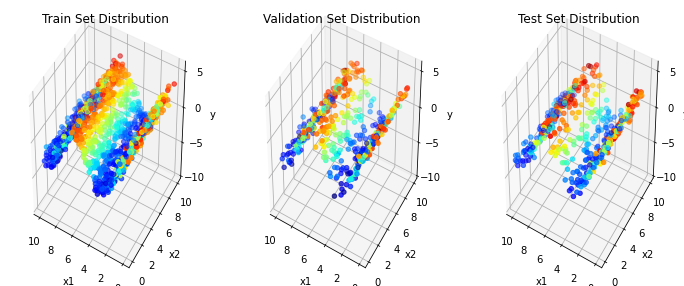

In [53]:
# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5)) # 차트 그리기 위한 캐버스 생성
ax1 = fig.add_subplot(1, 3, 1, projection='3d') # 캔버스에 작은 차트 생성
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet') # c는 색상 선택,cmap는 색상 그라이언트, x축 훈련용 x1값, y축 훈련용 x2값, z축 훈련용 y값 

ax1.set_xlabel('x1') # x축 제목
ax1.set_ylabel('x2') # y축 제목
ax1.set_zlabel('y') # z축 제목
ax1.set_title('Train Set Distribution') # 차트 제목
ax1.set_zlim(-10, 6) # z축 범위
ax1.view_init(40, -60) # 차트 보이는 각도 변경
ax1.invert_xaxis() # x축 시작 위치 변경

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

In [0]:
import torch
import torch.nn as nn
# 모델 정의
    
class MLPModel(nn.Module):
    # input = 입력값 개수, output = 출력값 개수
    def __init__(self,_input,_output,_hidden_layers): 
        super(MLPModel, self).__init__()
        self.inputv = _input
        self.outputv = _output
        nodes = [_input] + _hidden_layers + [_output]
        self.depth = len(nodes)
        linears = [nn.Linear(nodes[i], nodes[i+1]) for i in range(self.depth-1)]
        self.linears = nn.ModuleList(linears)
        self.relu = nn.ReLU()
        
    
    def forward(self, x):
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        for linear in self.linears[:-1]: 
          x = linear(x)
          x = self.relu(x)
        x = self.linears[-1](x)

        return x

In [55]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
# 학습에 필요한 파라미터 정의

model = MLPModel(2,1,[200,150,100,50,25,10]) # Model을 생성해줍니다.
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드입니다.

# ===== Construct Optimizer ====== #
lr = 0.005 # Learning Rate를 하나 정해줍니다. (원할한 학습을 위해 손을 많이 탑니다)
optimizer = optim.SGD(model.parameters(), lr=lr) # Optimizer를 생성해줍니다.
reg_loss = nn.MSELoss()
# 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들어줍시다.
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []


epoch = 4000 # 학습 횟수(epoch)을 지정해줍시다.


52446 parameters


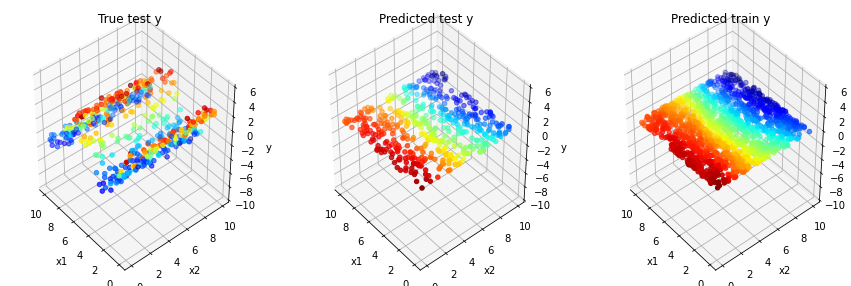

0 tensor(4.6414, grad_fn=<MseLossBackward>)


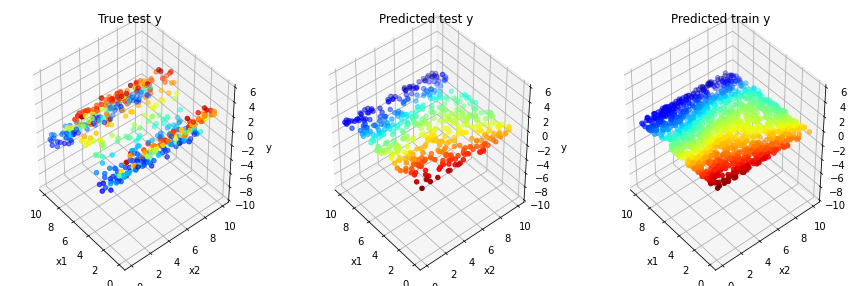

200 tensor(4.6355, grad_fn=<MseLossBackward>)


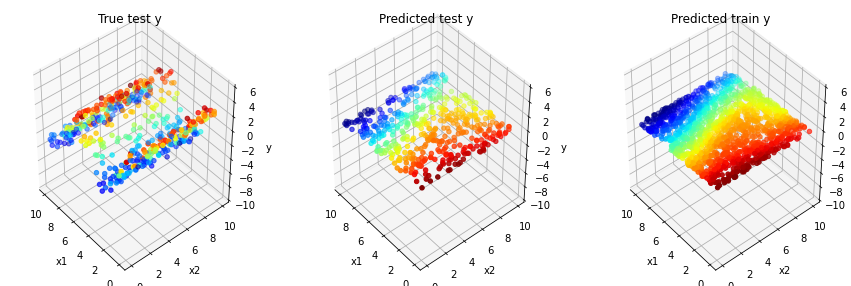

400 tensor(4.5865, grad_fn=<MseLossBackward>)


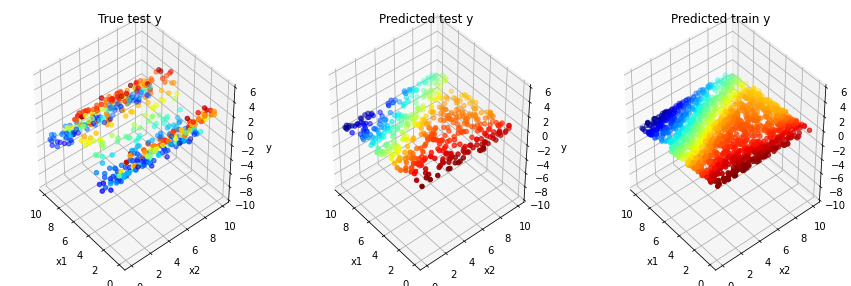

600 tensor(4.4939, grad_fn=<MseLossBackward>)


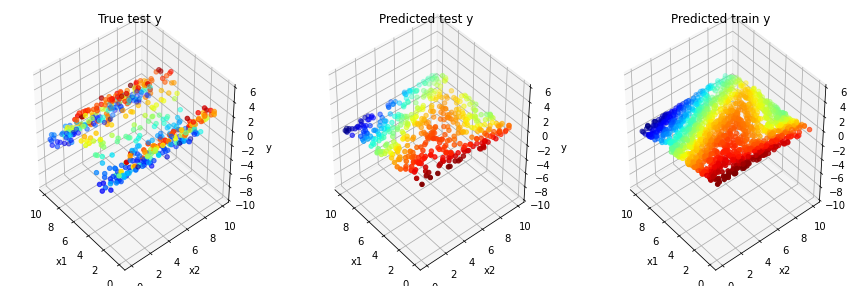

800 tensor(4.3344, grad_fn=<MseLossBackward>)


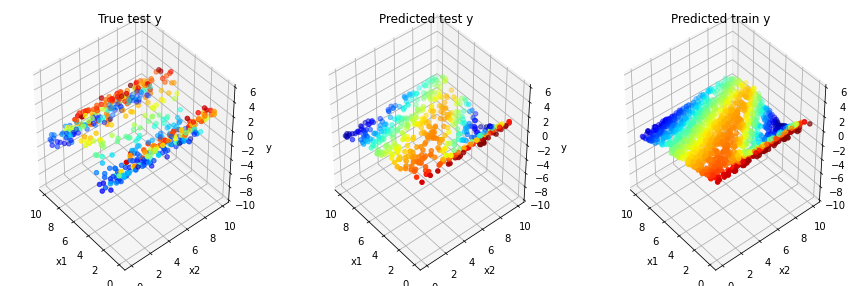

1000 tensor(3.9345, grad_fn=<MseLossBackward>)


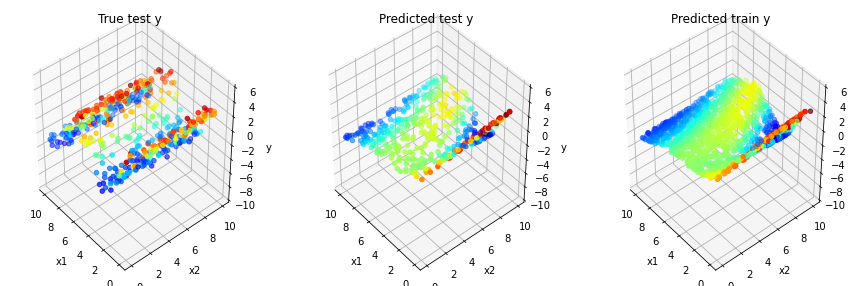

1200 tensor(3.1889, grad_fn=<MseLossBackward>)


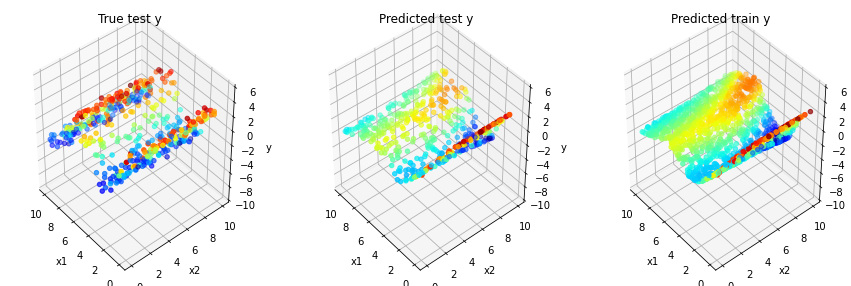

1400 tensor(2.0478, grad_fn=<MseLossBackward>)


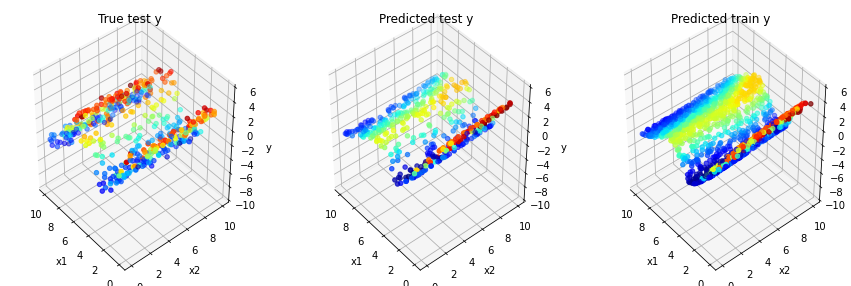

1600 tensor(1.3455, grad_fn=<MseLossBackward>)


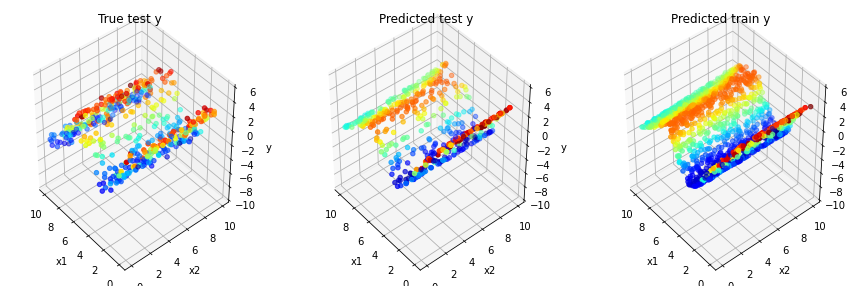

1800 tensor(2.2835, grad_fn=<MseLossBackward>)


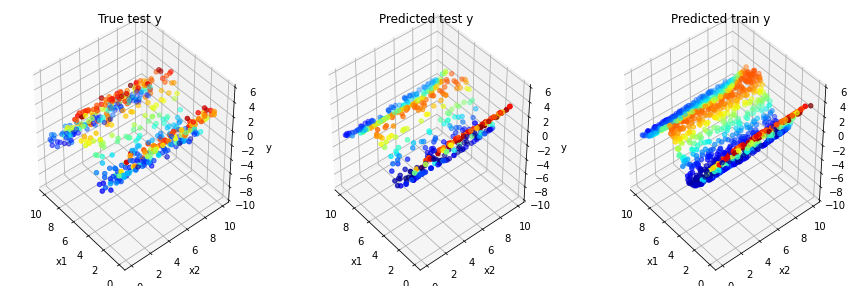

2000 tensor(0.8904, grad_fn=<MseLossBackward>)


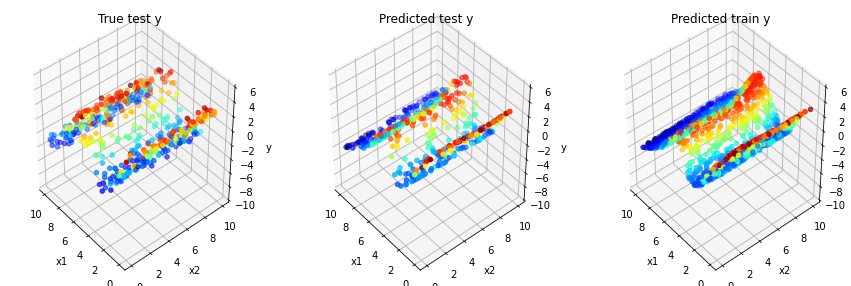

2200 tensor(2.2529, grad_fn=<MseLossBackward>)


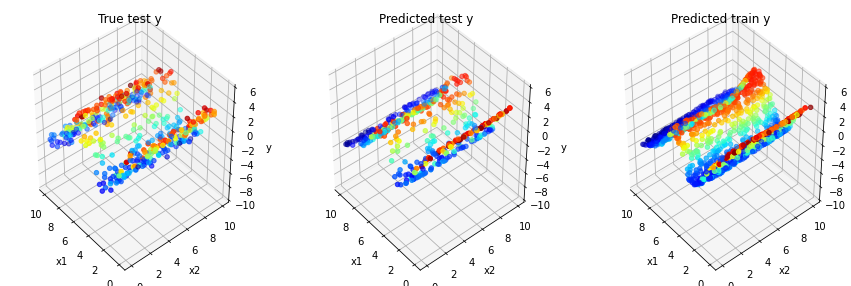

2400 tensor(1.3154, grad_fn=<MseLossBackward>)


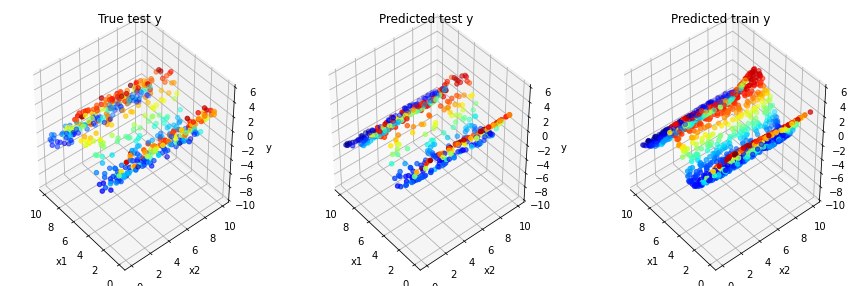

2600 tensor(1.1711, grad_fn=<MseLossBackward>)


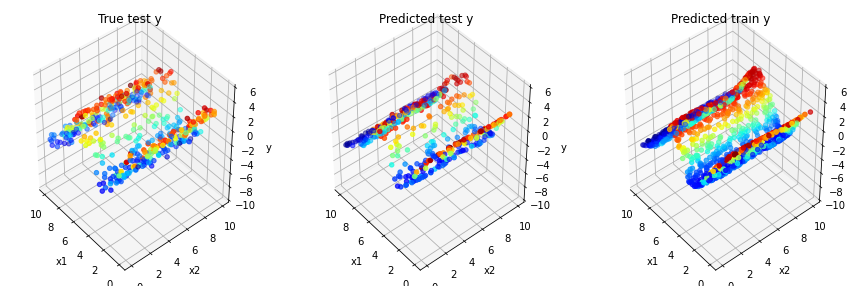

2800 tensor(1.0038, grad_fn=<MseLossBackward>)


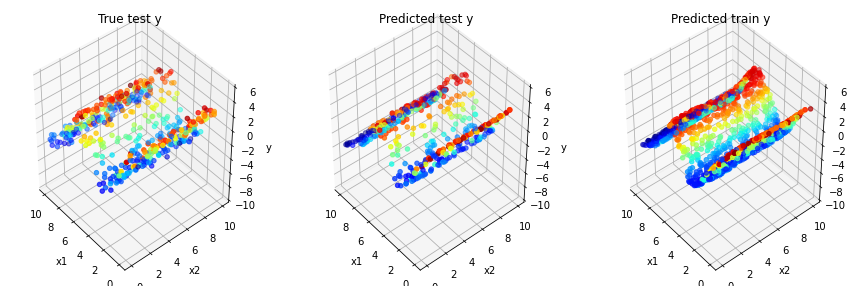

3000 tensor(0.8179, grad_fn=<MseLossBackward>)


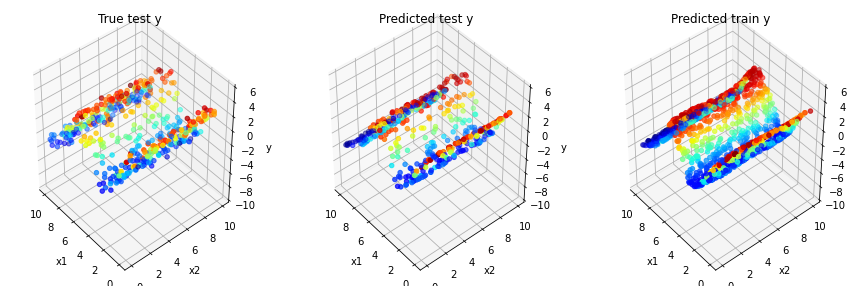

3200 tensor(0.7583, grad_fn=<MseLossBackward>)


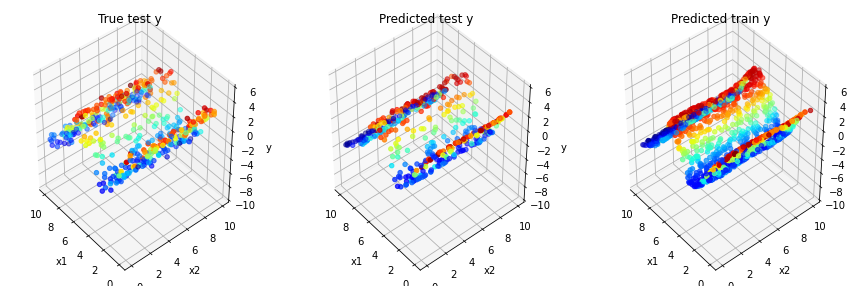

3400 tensor(0.6917, grad_fn=<MseLossBackward>)


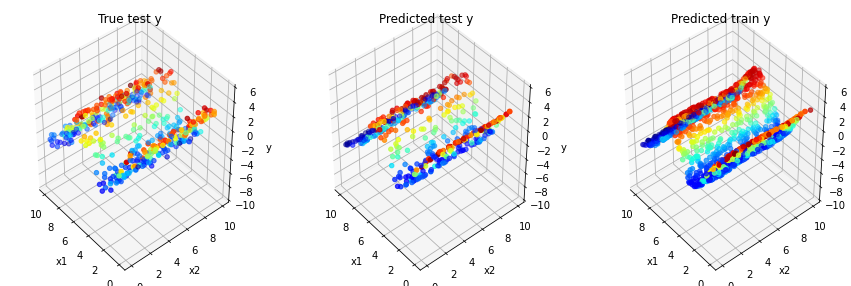

3600 tensor(0.6196, grad_fn=<MseLossBackward>)


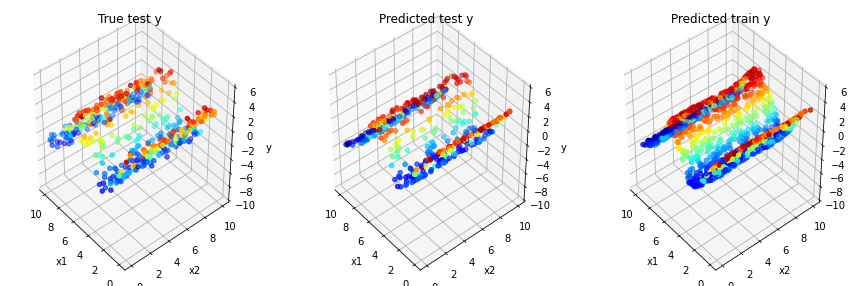

3800 tensor(0.5877, grad_fn=<MseLossBackward>)


In [56]:
#실제 학습, 평가, 평가 표시
for i in range(epoch):
    
    # ====== Train ====== #
    model.train() # model을 train 모드로 세팅합니다. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경할 겁니다 (나중 실습에서 쓸 겁니다)
    optimizer.zero_grad() # optimizer에 남아있을 수도 있는 잔여 그라디언트를 0으로 다 초기화해줍니다.
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)
    #print(input_x.shape, true_y.shape, pred_y.shape) # 각 인풋과 아웃풋의 차원을 체크해봅니다.
    
    loss = reg_loss(pred_y.squeeze(), true_y)
    loss.backward() # backward()를 통해서 그라디언트를 구해줍니다.
    optimizer.step() # step()을 통해서 그라디언틀르 바탕으로 파라미터를 업데이트 해줍니다. 
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    
    # ====== Validation ====== #
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    # ====== Evaluation ======= #
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        
        # ====== Calculate MAE ====== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        # ====== True Y Scattering ====== #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        # ====== Just for Visualizaing with High Resolution ====== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

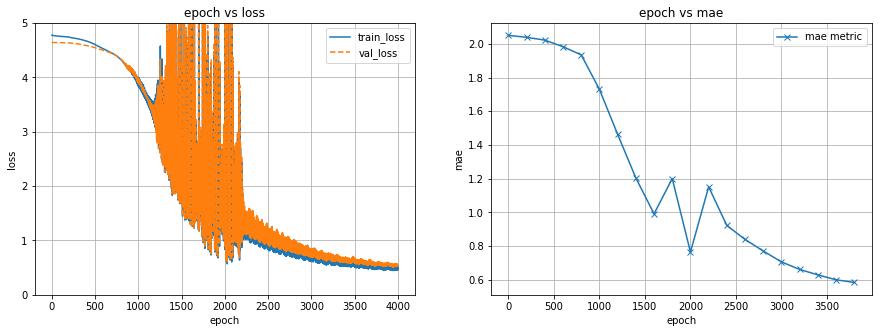

In [57]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()
